## toy dataset question


In [17]:
# load necessary imports and packages
import numpy as np, matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')


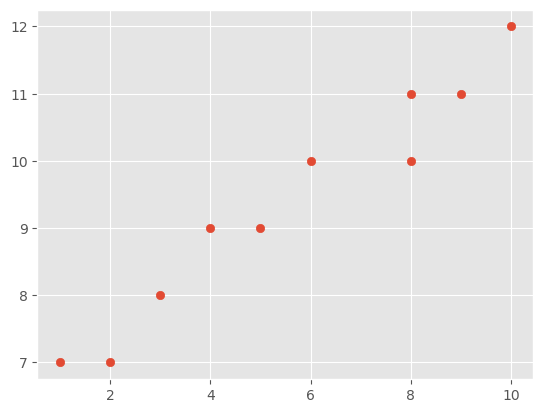

In [18]:
# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

plt.scatter(X, Y);

Our model is: y = 0.539x + 6.3796


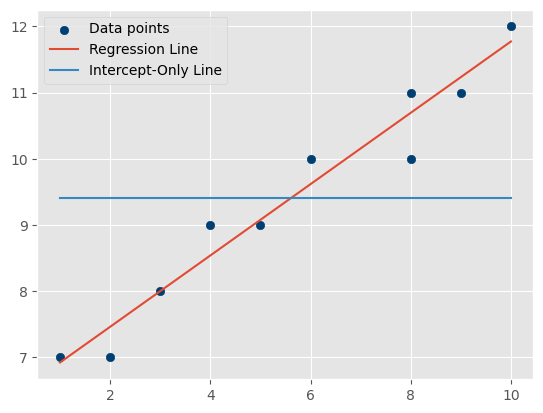

In [19]:
def calc_slope(x_vals, y_vals):
    # setting up components of formula
    rho = np.corrcoef(x_vals, y_vals)[0][1]
    s_y = y_vals.std()
    s_x = x_vals.std()
    
       # calculating slope estimate
    m = rho * s_y / s_x
    return m
def calc_intercept(m, x_vals, y_vals):
    # setting up components of formula
    y_mean = y_vals.mean()
    x_mean = x_vals.mean()
    
    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c

fig, ax = plt.subplots()
ax.scatter(X, Y, color='#003F72', label="Data points")

m = calc_slope(X, Y)
c = calc_intercept(m, X, Y)
print(f"Our model is: y = {round(m, 3)}x + {round(c, 4)}")

regression_line = m * X + c
ax.plot(X, regression_line, label="Regression Line")

intercept_only_line = np.array([Y.mean() for x in X])
ax.plot(X, intercept_only_line, label="Intercept-Only Line")

ax.legend();

    
    

# Using StatsModels

In [20]:
import statsmodels.api as sm , matplotlib.pyplot as plt , numpy as np ,pandas as pd, scipy.stats as stats , seaborn as sns ,statsmodels.api as sm 
import warnings 
warnings.filterwarnings('ignore')

## load the data


In [21]:
# load the data 
df_bmi = pd.read_csv(r'C:\Users\user\Downloads\heightWeight.csv')

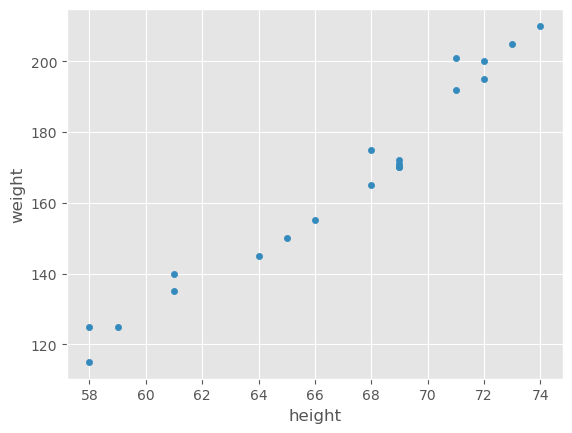

In [22]:
# plot in a scatter plot 
df_bmi.plot.scatter(x ="height", y="weight");

In [25]:
X = df_bmi[["height"]]
y = df_bmi["weight"]

## creating the model 


In [26]:
model = sm.OLS(endog=y, exog=sm.add_constant(X))
model

In [27]:
results = model.fit()
results

## evaluating and interpreting the model

In [28]:
results.fvalue, results.f_pvalue

(384.7740288570766, 1.3461445985228785e-13)

In [29]:
results.rsquared

0.9553099288673669

In [30]:
results.params

const    -204.483436
height      5.539019
dtype: float64

In [31]:
results.pvalues

const     2.688182e-09
height    1.346145e-13
dtype: float64

In [32]:
print(results.conf_int())

                 0           1
const  -244.252410 -164.714462
height    4.945766    6.132272


In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.35e-13
Time:                        17:24:44   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -204.4834     18.929    -10.802      0.0

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.35e-13
Time:                        17:24:58   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -204.4834     18.929    -10.802      0.000    -244.252    -164.714
height         5.5390      0.282     19.616      0.000       4.946       6.132
==============================================================================
Omnibus:                        2.588   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.245
Skew:                           0.202   Prob(JB):                        0.537
Kurtosis:                       1.846   Cond. No.                         902.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## plotting Fit 

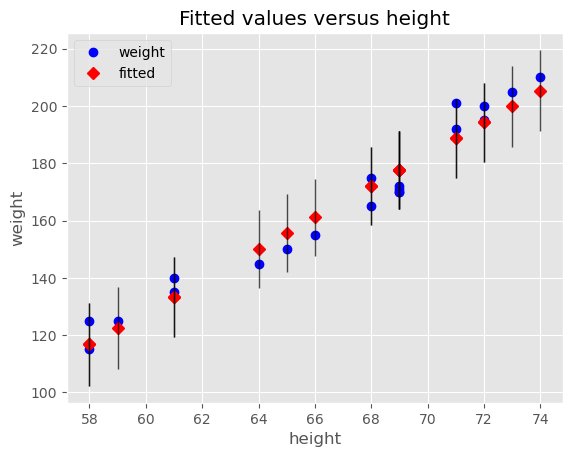

In [35]:
sm.graphics.plot_fit(results, "height")
plt.show()


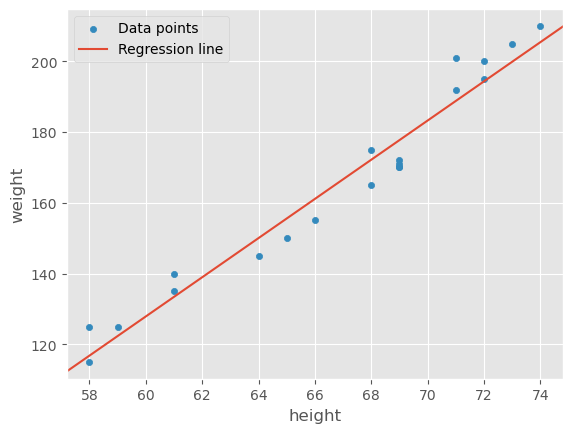

In [37]:
fig, ax = plt.subplots()
df_bmi.plot.scatter(x="height", y="weight", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

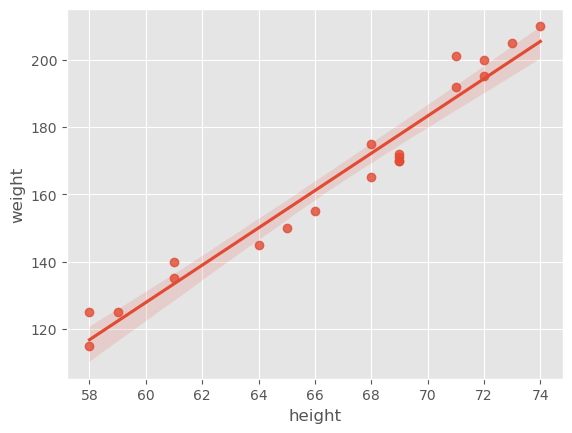

In [39]:
sns.regplot(x="height", y="weight", data=df_bmi);

# plotting residuals 

In [40]:
results.resid

0     -7.169872
1     12.213070
2      6.603263
3     -7.708891
4      3.213070
5      8.220320
6      0.674051
7      5.135032
8     -1.779680
9      4.596012
10     1.603263
11     2.681301
12    -5.708891
13     2.830128
14    -5.013795
15    -7.708891
16     5.674051
17    -6.091834
18    -5.552814
19    -6.708891
dtype: float64

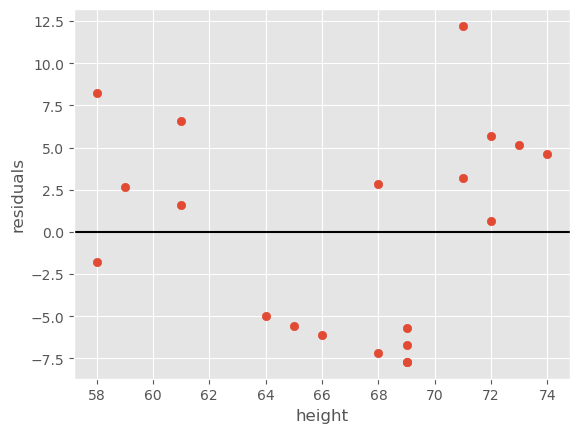

In [41]:
fig, ax = plt.subplots()

ax.scatter(df_bmi["height"], results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("height")
ax.set_ylabel("residuals");

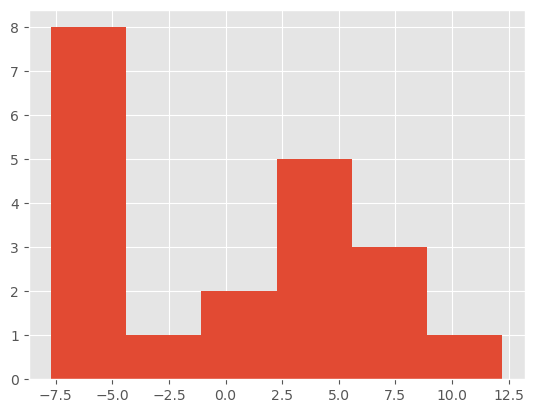

In [42]:
plt.hist(results.resid, bins="auto");

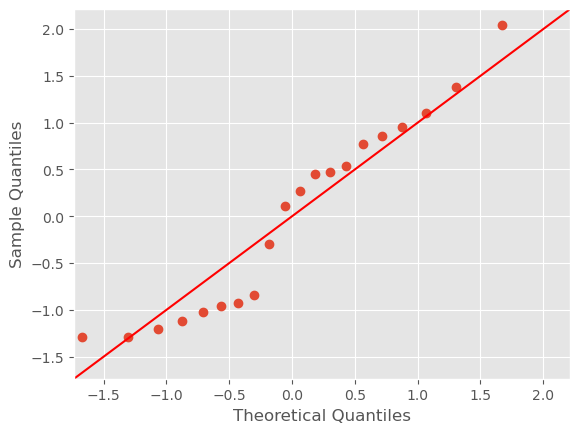

In [43]:
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True)
plt.show()

In [45]:
import statsmodels.formula.api as smf

rstyle_model = smf.ols(formula="weight ~ height", data=df_bmi)
rstyle_results = rstyle_model.fit()
print(rstyle_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     384.8
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.35e-13
Time:                        17:32:17   Log-Likelihood:                -64.112
No. Observations:                  20   AIC:                             132.2
Df Residuals:                      18   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -204.4834     18.929    -10.802      0.0